In [1]:
# Example map projection plot of a field in WACCM
# /glade/u/home/marsh/demo/map_example.ipynb
# 5 Oct 2020

# import modules to access netcdf files and plot data
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point  

In [2]:
# open a WACCM monthly mean file (here a PI control for December)

data_dir = '/glade/u/home/marsh/demo/sample_data/'
waccm_file = 'b.e21.BWma1850.f19_g17.CMIP6-piControl-WACCM-MA-2deg.001.cam.h0.0300-12.nc'

ds = xr.open_dataset(data_dir+waccm_file)


In [3]:
# extract surface temperature and extend it to wrap in longitude (avoids dreaded white strip)

ts = ds['TS'].isel(time=0)
ts_cyc, lon_cyc = add_cyclic_point(ts, coord=ds['lon'])
lat = ds['lat']

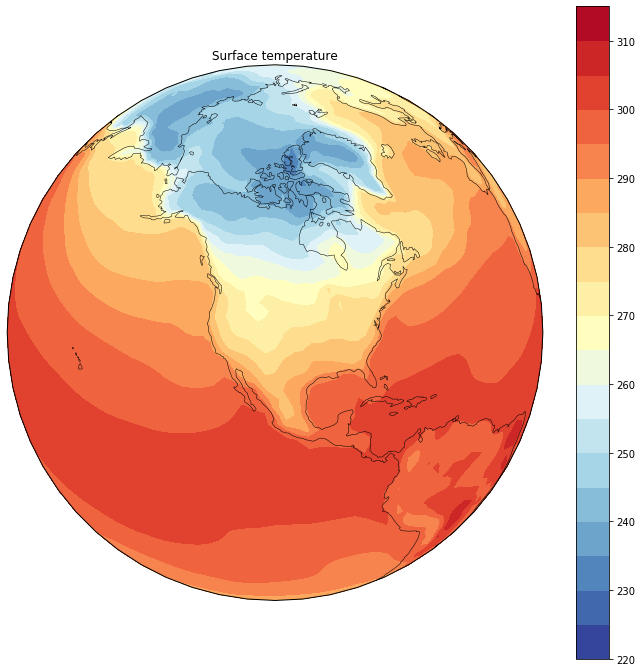

In [4]:
# create a contour plot 
fig = plt.figure(figsize=(12,12))

# Generate axes using Cartopy, center plot on Boulder
ax = plt.axes( projection=ccrs.Orthographic(central_longitude=255, central_latitude=40))

ax.set_global() # zoom the map out as much as possible
ax.coastlines(linewidths=0.5) # draw coastlines
ax.set_title('Surface temperature')

clevels = np.arange(220,320,5)

# Contourf-plot data (for filled contours)
im = ax.contourf(lon_cyc, lat, ts_cyc, 
             transform=ccrs.PlateCarree(),
             levels=clevels, 
             cmap='RdYlBu_r')

plt.colorbar(im)

# Show the plot
plt.show()

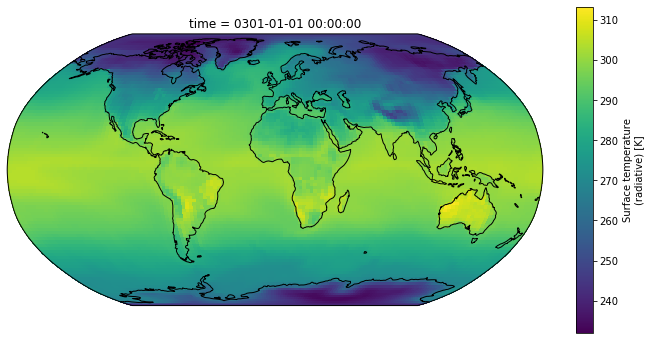

In [9]:
# an even simpler global map
fig = plt.figure(figsize=(12,6))
    
ax = plt.axes(projection=ccrs.Robinson())

#zoom the map out as much as possible & add coastlines
ax.set_global() 
ax.coastlines()

ts.plot(transform=ccrs.PlateCarree())

plt.show()